# Import Necessary Packages

In [22]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Training and Testing data

In [23]:
train_data_dir = pd.read_csv('./CIFAR/train_data.csv')
test_data_dir = pd.read_csv('./CIFAR/test_data.csv')

In [24]:
y_train = train_data_dir['label']
x_train = train_data_dir.drop(['label'], axis=1)

In [25]:
y_test = test_data_dir['label']
x_test = test_data_dir.drop(['label'], axis=1)

In [26]:
#((x_train,y_train),(x_test,y_test)) = cifar10.load_data()

In [27]:
x_train.shape

(50000, 3072)

In [28]:
x_test.shape

(10000, 3072)

In [29]:
y_train.shape

(50000,)

In [30]:
#flattening
#x_train = x_train.reshape((x_train.shape[0],-1))
#x_test = x_test.reshape((x_test.shape[0],-1))

#normalizing
x_train = x_train/255.0
x_test = x_test/255.0

In [31]:
x_train.shape

(50000, 3072)

In [32]:
x_test.shape

(10000, 3072)

In [33]:
#labelling
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the network architecture using Keras

In [34]:
model = Sequential()
model.add(Dense(64, input_shape=(3072,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

C:\Users\abhij\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#  Train the model using Adam optimizer

In [35]:
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [36]:
H = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.2510 - loss: 2.0227 - val_accuracy: 0.3509 - val_loss: 1.7937
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3597 - loss: 1.7709 - val_accuracy: 0.3795 - val_loss: 1.7214
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3895 - loss: 1.7007 - val_accuracy: 0.4141 - val_loss: 1.6437
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4034 - loss: 1.6540 - val_accuracy: 0.4097 - val_loss: 1.6470
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4150 - loss: 1.6336 - val_accuracy: 0.4082 - val_loss: 1.6442
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4250 - loss: 1.6080 - val_accuracy: 0.4116 - val_loss: 1.6378
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4278 - loss: 1.5938 - val_accuracy: 0.4074 - val_loss: 1.6398
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.4298 - loss: 

# Evaluate the network

In [37]:
predictions = model.predict(x_test)
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names = [str(x) for x in lb.classes_]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.52      0.42      0.47      1000
           1       0.63      0.37      0.47      1000
           2       0.32      0.23      0.27      1000
           3       0.28      0.27      0.27      1000
           4       0.37      0.37      0.37      1000
           5       0.41      0.22      0.29      1000
           6       0.39      0.58      0.47      1000
           7       0.49      0.48      0.48      1000
           8       0.39      0.72      0.51      1000
           9       0.47      0.52      0.49      1000

    accuracy                           0.42     10000
   macro avg       0.43      0.42      0.41     10000
weighted avg       0.43      0.42      0.41     10000



#  Plot the training loss and accuracy

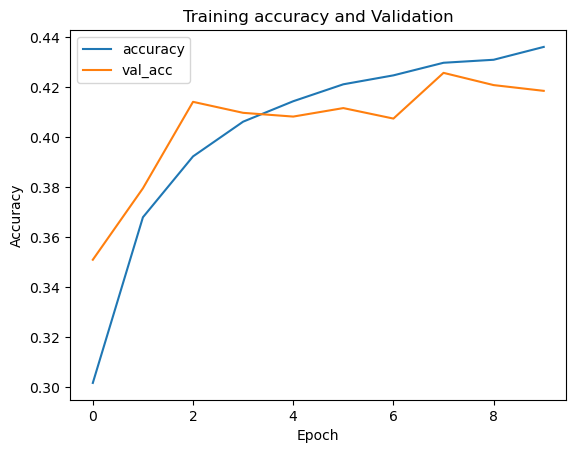

In [38]:
plt.plot(np.arange(0,epochs), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0,epochs),H.history["val_accuracy"], label="val_acc")

plt.title("Training accuracy and Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

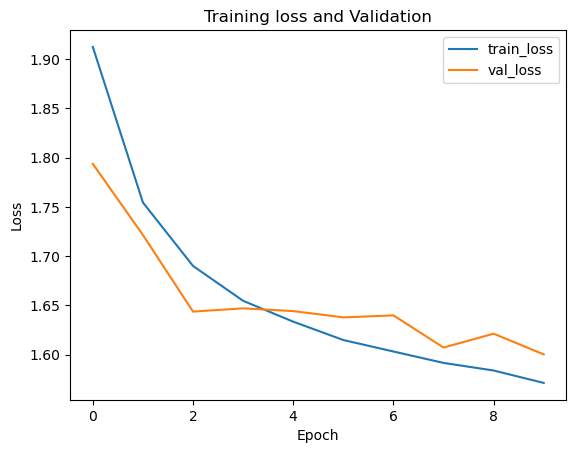

In [39]:
plt.plot(np.arange(0,epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs),H.history["val_loss"], label="val_loss")

plt.title("Training loss and Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()